In [18]:
'''
vectorization
multiple features
'''

'\nvectorization\nmultiple features\n'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column contains non-numeric values
        df[column] = df[column].replace({'yes': 1, 'no': 0, 'furnished':1,'semi-furnished':0.5,'unfurnished':0})


In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [28]:
y_train = df['price'].values

In [29]:
x_train = df.drop('price', axis=1).values

In [30]:
x_train

array([[7.42e+03, 4.00e+00, 2.00e+00, ..., 2.00e+00, 1.00e+00, 1.00e+00],
       [8.96e+03, 4.00e+00, 4.00e+00, ..., 3.00e+00, 0.00e+00, 1.00e+00],
       [9.96e+03, 3.00e+00, 2.00e+00, ..., 2.00e+00, 1.00e+00, 5.00e-01],
       ...,
       [3.62e+03, 2.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.91e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [3.85e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [31]:
y_train

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [32]:
print(x_train.shape)

(545, 12)


In [33]:
print(y_train.shape)

(545,)


In [34]:
import numpy as np

means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)

normalized_x_train = (x_train - means) / stds

In [35]:
normalized_x_train

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.51769249,
         1.80494113,  1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  2.67940935,
        -0.55403469,  1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.51769249,
         1.80494113,  0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.22296203]])

In [36]:
y_mean = np.mean(y_train)
y_std = np.std(y_train)
normalized_y_train = (y_train - y_mean)/y_std

In [37]:
normalized_y_train

array([ 4.56636513e+00,  4.00448405e+00,  4.00448405e+00,  3.98575468e+00,
        3.55497918e+00,  3.25530927e+00,  2.88072189e+00,  2.88072189e+00,
        2.73088693e+00,  2.69342819e+00,  2.69342819e+00,  2.62974834e+00,
        2.43121702e+00,  2.39375829e+00,  2.39375829e+00,  2.31884081e+00,
        2.31884081e+00,  2.24392333e+00,  2.20646459e+00,  2.18773522e+00,
        2.13154711e+00,  2.09408838e+00,  2.07535901e+00,  2.07535901e+00,
        2.03790027e+00,  2.01917090e+00,  1.97796629e+00,  1.94425342e+00,
        1.94425342e+00,  1.94425342e+00,  1.94425342e+00,  1.94425342e+00,
        1.88806531e+00,  1.83187721e+00,  1.79441847e+00,  1.77351649e+00,
        1.75321385e+00,  1.71950099e+00,  1.71013630e+00,  1.68204225e+00,
        1.66331288e+00,  1.64458351e+00,  1.56966604e+00,  1.56966604e+00,
        1.49474856e+00,  1.49474856e+00,  1.47601919e+00,  1.45728982e+00,
        1.43856045e+00,  1.41983108e+00,  1.41983108e+00,  1.41983108e+00,
        1.38237234e+00,  

In [42]:
w = np.zeros_like(x_train[0])
b = 0

In [61]:
def compute_loss(w,b,x,y):
    loss = 0
    for i in range(0,len(x)):
        y_pred = np.dot(w,x[i]) + b
        loss += (y_pred - y[i])**2
    return loss/(2*len(x))

In [107]:
def compute_grad(w,b,x,y):
    dJ_dw = []
    dJ_db = 0
    for i in range(0,len(w)):
        dJ_dw_i = 0
        for j in range(0,len(x)):
            y_pred = np.dot(w,x[j]) + b
            dJ_dw_i +=  (y_pred-y[j])*x[j][i]
        dJ_dw.append(dJ_dw_i/len(x))

    for j in range(0,len(x)):
        y_pred = np.dot(w,x[j]) + b
        dJ_db +=  (y_pred-y[j])

    return np.array(dJ_dw),dJ_db/len(x)

In [108]:
def gradient_descent(w,b,x,y,lr,iterations):
    loss_history = []
    params = []
    for i in range(0,iterations):
        temp_loss = compute_loss(w,b,x,y)
        print("w:")
        print(w)
        print("temp_loss:")
        print(temp_loss)
        loss_history.append(temp_loss)
        dJ_dw, dJ_db = compute_grad(w,b,x,y)
        w = w - lr*dJ_dw
        b = b - lr*dJ_db
        params.append([w,b])
    return loss_history, params, w, b

In [112]:
l_hisory, p, w_final, b_final = gradient_descent(w,b,normalized_x_train,normalized_y_train,lr=0.001,iterations=15000)

w:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
temp_loss:
0.5000000000000009
w:
[5.35997346e-04 3.66494026e-04 5.17545339e-04 4.20712366e-04
 2.96898489e-04 2.55517290e-04 1.87056598e-04 9.30728439e-05
 4.52954084e-04 3.84393649e-04 3.29777050e-04 3.04721462e-04]
temp_loss:
0.4983838915550543
w:
[0.00107077 0.00073195 0.00103391 0.00084043 0.00059301 0.00051033
 0.00037363 0.00018605 0.00090485 0.00076781 0.00065876 0.00060861]
temp_loss:
0.49677568011893025
w:
[0.00160433 0.00109636 0.00154909 0.00125915 0.00088832 0.00076444
 0.00055971 0.00027892 0.00135568 0.00115025 0.00098695 0.00091167]
temp_loss:
0.4951753267984408
w:
[0.00213666 0.00145973 0.00206309 0.00167687 0.00118285 0.00101784
 0.0007453  0.00037169 0.00180546 0.00153171 0.00131435 0.0012139 ]
temp_loss:
0.49358279289240503
w:
[0.00266779 0.00182207 0.00257592 0.00209361 0.0014766  0.00127054
 0.00093042 0.00046437 0.00225419 0.00191221 0.00164096 0.0015153 ]
temp_loss:
0.49199803989070034
w:
[0.0031977  0.00218338 0.00308758 

In [113]:
l_hisory

[0.5000000000000009,
 0.4983838915550543,
 0.49677568011893025,
 0.4951753267984408,
 0.49358279289240503,
 0.49199803989070034,
 0.49042102947331967,
 0.4888517235094303,
 0.48729008405644003,
 0.48573607335906754,
 0.48418965384841794,
 0.48265078814105855,
 0.4811194390381044,
 0.4795955695243101,
 0.4780791427671535,
 0.476570122115946,
 0.4750684711009196,
 0.473574153432344,
 0.47208713299963284,
 0.47060737387045787,
 0.46913484028987174,
 0.46766949667942764,
 0.466211307636309,
 0.4647602379324624,
 0.4633162525137343,
 0.46187931649900876,
 0.460449395179358,
 0.45902645401718645,
 0.45761045864538685,
 0.45620137486649814,
 0.45479916865186687,
 0.45340380614081127,
 0.45201525363979667,
 0.4506334776216027,
 0.4492584447245068,
 0.44789012175146536,
 0.44652847566929876,
 0.4451734736078834,
 0.44382508285934597,
 0.4424832708772599,
 0.4411480052758499,
 0.4398192538291994,
 0.4384969844704574,
 0.4371811652910525,
 0.43587176453991616,
 0.4345687506226994,
 0.433272092100

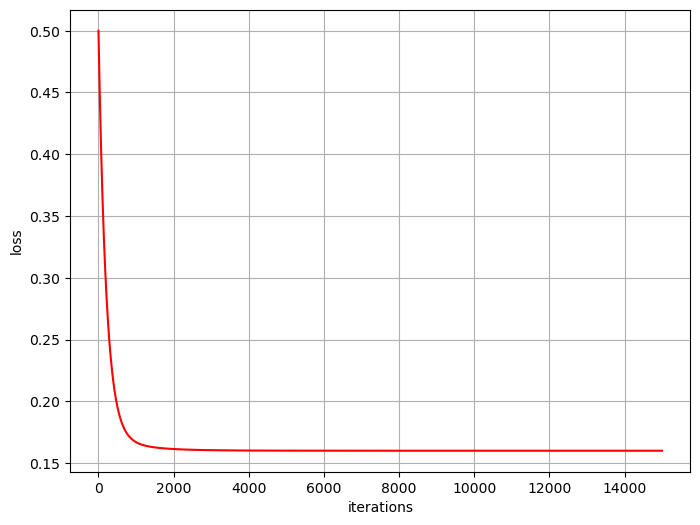

In [114]:
plt.figure(figsize=(8,6))
plt.plot(range(0,15000),l_hisory,c='r')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.grid(True)
plt.show()

In [120]:
x_mean = np.mean(x_train,axis=0)
x_std = np.std(x_train,axis=0)
print(x_mean)
print(x_std)
    

[5.15054128e+03 2.96513761e+00 1.28623853e+00 1.80550459e+00
 8.58715596e-01 1.77981651e-01 3.50458716e-01 4.58715596e-02
 3.15596330e-01 6.93577982e-01 2.34862385e-01 4.65137615e-01]
[2.16814915e+03 7.37386427e-01 5.02008423e-01 8.66696233e-01
 3.48314687e-01 3.82497298e-01 4.77113618e-01 2.09206500e-01
 4.64752931e-01 8.60794942e-01 4.23912780e-01 3.80336921e-01]


In [131]:
y_pred = []
for i in range(0,len(x_train)):
    y_pred_temp = (np.dot(w_final,(x_train[i]-x_mean)/x_std) + b)
    y_pred.append((y_pred_temp*y_std) + y_mean)

In [132]:
y_pred = np.array(y_pred)

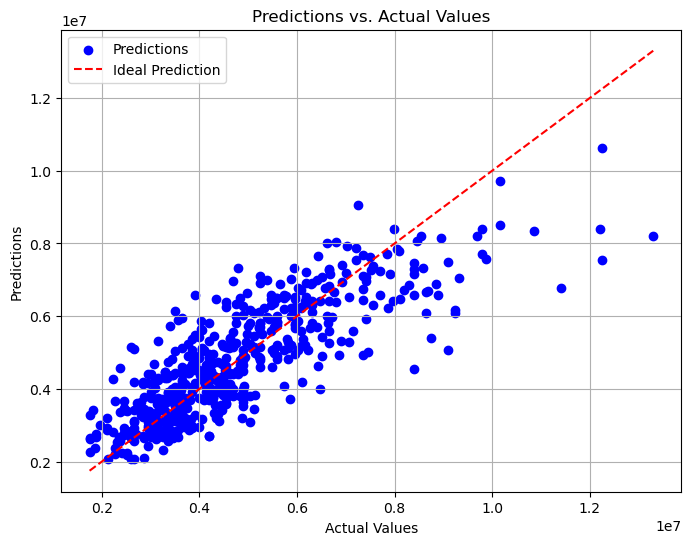

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, color='blue', label='Predictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
area = df['area'].values

In [137]:
area

array([ 7420,  8960,  9960,  7500,  7420,  7500,  8580, 16200,  8100,
        5750, 13200,  6000,  6550,  3500,  7800,  6000,  6600,  8500,
        4600,  6420,  4320,  7155,  8050,  4560,  8800,  6540,  6000,
        8875,  7950,  5500,  7475,  7000,  4880,  5960,  6840,  7000,
        7482,  9000,  6000,  6000,  6550,  6360,  6480,  6000,  6000,
        6000,  6000,  6600,  4300,  7440,  7440,  6325,  6000,  5150,
        6000,  6000, 11440,  9000,  7680,  6000,  6000,  8880,  6240,
        6360, 11175,  8880, 13200,  7700,  6000, 12090,  4000,  6000,
        5020,  6600,  4040,  4260,  6420,  6500,  5700,  6000,  6000,
        4000, 10500,  6000,  3760,  8250,  6670,  3960,  7410,  8580,
        5000,  6750,  4800,  7200,  6000,  4100,  9000,  6400,  6600,
        6000,  6600,  5500,  5500,  6350,  5500,  4500,  5450,  6420,
        3240,  6615,  6600,  8372,  4300,  9620,  6800,  8000,  6900,
        3700,  6420,  7020,  6540,  7231,  6254,  7320,  6525, 15600,
        7160,  6500,

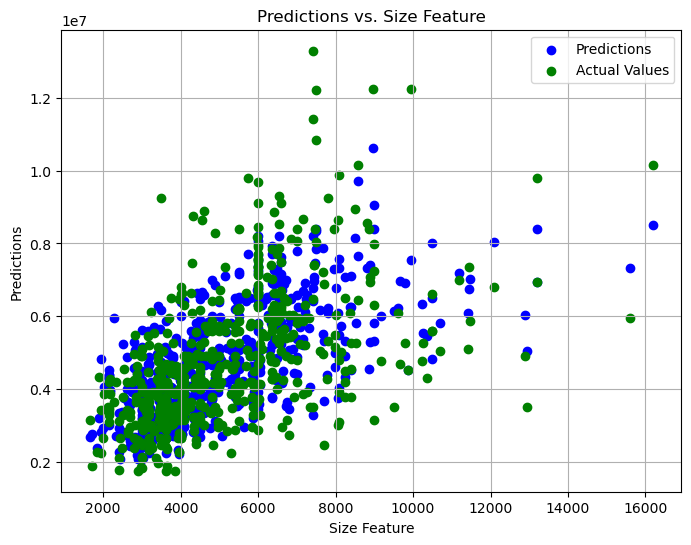

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(area, y_pred, color='b', label='Predictions')
plt.scatter(area, y_train, color='g', label='Actual Values') 
plt.xlabel('Size Feature')
plt.ylabel('Predictions')
plt.title('Predictions vs. Size Feature')
plt.grid(True)
plt.legend()
plt.show()